In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

import datetime

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
actualDF = pd.read_csv("DW_prayer_times.csv")

actualDF = actualDF[
    ["date","esolat_fajr","esolat_zuhr","esolat_asr","esolat_maghrib","esolat_isha"]
]
actualDF["date"] = pd.to_datetime(actualDF["date"]).dt.date

# from exploratory_data_analysis.ipynb
# adjust +8 mins for esolat_fajr before 2019-11-30
actualDF["esolat_fajr"] = np.where(\
    actualDF["date"] < datetime.date(2019, 11, 30),\
    actualDF["esolat_fajr"] + 8,\
    actualDF["esolat_fajr"]\
)

actualDF

,date,esolat_fajr,esolat_zuhr,esolat_asr,esolat_maghrib,esolat_isha
0,2018-01-01,366,799,1002,1156,1230
1,2018-01-02,366,800,1002,1156,1231
2,2018-01-03,367,800,1003,1157,1231
3,2018-01-04,367,801,1003,1157,1232
4,2018-01-05,368,801,1004,1158,1232
...,...,...,...,...,...,...
2917,2025-12-27,364,797,1000,1154,1229
2918,2025-12-28,364,798,1000,1155,1229
2919,2025-12-29,365,798,1001,1155,1230
2920,2025-12-30,365,799,1001,1156,1230


<h2>Normalize or Standardize Data?</h2>
<ul>
    <li>If data follows normal distribution, then standardize data</li>
    <li>Else, normalize data</li>
</ul>

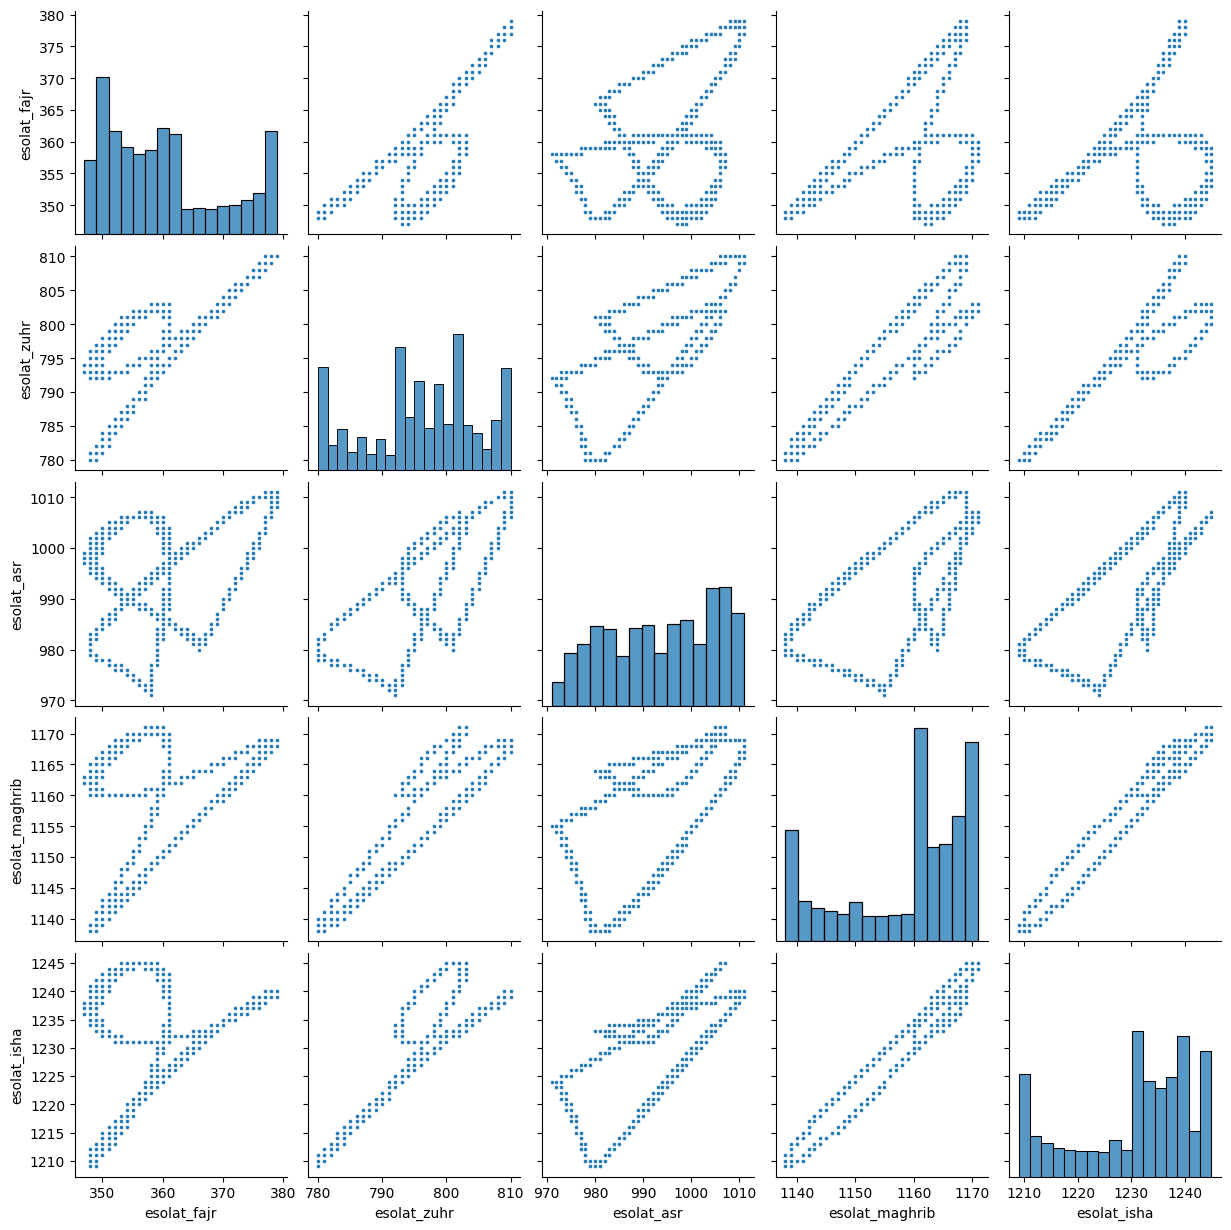

In [3]:
sns.pairplot(
    actualDF,
    vars=["esolat_fajr","esolat_zuhr","esolat_asr","esolat_maghrib","esolat_isha"],
    markers="."
)
plt.show()

Data does not follow normal distribution. Hence, normalize data.

In [4]:
normalizedDF = actualDF.copy()

for column in normalizedDF.columns:
    if column == "date":
        continue

    DataToMin = normalizedDF[column] - normalizedDF[column].min()
    MaxToMin = normalizedDF[column].max() - normalizedDF[column].min()

    normalizedDF[column] = DataToMin / MaxToMin

In [5]:
print(normalizedDF.head())
print(normalizedDF.tail())

         date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
0  2018-01-01      0.59375     0.633333       0.775        0.545455   
1  2018-01-02      0.59375     0.666667       0.775        0.545455   
2  2018-01-03      0.62500     0.666667       0.800        0.575758   
3  2018-01-04      0.62500     0.700000       0.800        0.575758   
4  2018-01-05      0.65625     0.700000       0.825        0.606061   

   esolat_isha  
0     0.583333  
1     0.611111  
2     0.611111  
3     0.638889  
4     0.638889  
            date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
2917  2025-12-27      0.53125     0.566667       0.725        0.484848   
2918  2025-12-28      0.53125     0.600000       0.725        0.515152   
2919  2025-12-29      0.56250     0.600000       0.750        0.515152   
2920  2025-12-30      0.56250     0.633333       0.750        0.545455   
2921  2025-12-31      0.59375     0.633333       0.775        0.545455   

      esolat_isha  
2917  

<h2>Data Modeling</h2>

<h4>Train and Test sets</h4>
<table>
    <tbody>
        <tr>
            <td><b>Label</b></td>
            <td><b>Percentage</b></td>
            <td><b>Date/Year Range</b></td>
        </tr>
        <tr>
            <td>Train</td>
            <td>75.0</td>
            <td>2018 - 2023</td>
        </tr>
        <tr>
            <td>Validation</td>
            <td>12.5</td>
            <td>2024</td>
        </tr>
        <tr>
            <td>Test</td>
            <td>12.5</td>
            <td>2025</td>
        </tr>
    </tbody>
</table>

In [6]:
start_validation = datetime.date(2024, 1, 1)
start_test = datetime.date(2025, 1, 1)

In [7]:
train = normalizedDF.loc[normalizedDF["date"] < start_validation]
print(train.head())
print(train.tail())

         date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
0  2018-01-01      0.59375     0.633333       0.775        0.545455   
1  2018-01-02      0.59375     0.666667       0.775        0.545455   
2  2018-01-03      0.62500     0.666667       0.800        0.575758   
3  2018-01-04      0.62500     0.700000       0.800        0.575758   
4  2018-01-05      0.65625     0.700000       0.825        0.606061   

   esolat_isha  
0     0.583333  
1     0.611111  
2     0.611111  
3     0.638889  
4     0.638889  
            date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
2186  2023-12-27      0.53125     0.566667       0.700        0.484848   
2187  2023-12-28      0.53125     0.566667       0.725        0.484848   
2188  2023-12-29      0.56250     0.600000       0.725        0.515152   
2189  2023-12-30      0.56250     0.600000       0.750        0.515152   
2190  2023-12-31      0.59375     0.633333       0.750        0.545455   

      esolat_isha  
2186  

In [8]:
validation_mask = (normalizedDF["date"] >= start_validation) & (normalizedDF["date"] < start_test)
validation = normalizedDF.loc[validation_mask]
print(validation.head())
print(validation.tail())

            date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
2191  2024-01-01      0.59375     0.633333       0.775        0.545455   
2192  2024-01-02      0.62500     0.666667       0.775        0.575758   
2193  2024-01-03      0.62500     0.666667       0.800        0.575758   
2194  2024-01-04      0.65625     0.700000       0.800        0.606061   
2195  2024-01-05      0.65625     0.700000       0.825        0.606061   

      esolat_isha  
2191     0.611111  
2192     0.611111  
2193     0.638889  
2194     0.638889  
2195     0.666667  
            date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
2552  2024-12-27      0.53125     0.566667       0.725        0.484848   
2553  2024-12-28      0.56250     0.600000       0.725        0.515152   
2554  2024-12-29      0.56250     0.600000       0.750        0.515152   
2555  2024-12-30      0.59375     0.633333       0.750        0.545455   
2556  2024-12-31      0.59375     0.633333       0.775        0.5

In [9]:
test = normalizedDF.loc[normalizedDF["date"] > start_test]
print(test.head())
print(test.tail())

            date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
2558  2025-01-02      0.62500     0.666667       0.800        0.575758   
2559  2025-01-03      0.65625     0.700000       0.800        0.606061   
2560  2025-01-04      0.65625     0.700000       0.825        0.606061   
2561  2025-01-05      0.68750     0.700000       0.825        0.636364   
2562  2025-01-06      0.68750     0.733333       0.825        0.636364   

      esolat_isha  
2558     0.638889  
2559     0.638889  
2560     0.666667  
2561     0.666667  
2562     0.666667  
            date  esolat_fajr  esolat_zuhr  esolat_asr  esolat_maghrib  \
2917  2025-12-27      0.53125     0.566667       0.725        0.484848   
2918  2025-12-28      0.53125     0.600000       0.725        0.515152   
2919  2025-12-29      0.56250     0.600000       0.750        0.515152   
2920  2025-12-30      0.56250     0.633333       0.750        0.545455   
2921  2025-12-31      0.59375     0.633333       0.775        0.5

<h4>Build Model</h4>

Auto-Regressive Integrated Moving Average (ARIMA)

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

In [11]:
def analyze_arima(col_name = ""):
    if col_name not in normalizedDF.columns:
        return

    q = range(0,10)

    params = product(q)
    params_list = list(params)

    results = []
    best_aic = float("inf")


    for z in params_list:
        try:
            model = ARIMA(train[col_name], order=(1,0,z)).fit()
        except ValueError:
            print("WRONG PARAMETERS! : ", z)
            continue

        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
        results.append([1,0,z[0],aic])
    
    results_table = pd.DataFrame(results)
    results_table.columns = ["p","d","q","AIC"]
    print(results_table.sort_values(by="AIC", ascending=True).head().to_string(index=False))
    print(best_model.summary())

In [12]:
analyze_arima("esolat_fajr")

 p  d  q           AIC
 1  0  4 -12354.361612
 1  0  9 -12317.713255
 1  0  5 -12295.512254
 1  0  8 -12276.942197
 1  0  2 -12254.075167
                               SARIMAX Results                                
Dep. Variable:            esolat_fajr   No. Observations:                 2191
Model:               ARIMA(1, 0, [4])   Log Likelihood                6181.181
Date:                Tue, 17 Dec 2024   AIC                         -12354.362
Time:                        21:57:30   BIC                         -12331.593
Sample:                             0   HQIC                        -12346.040
                               - 2191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4631      0.232      1.997      0.046       0.009      

In [13]:
analyze_arima("esolat_zuhr")

 p  d  q           AIC
 1  0  6 -12172.190622
 1  0  4 -12167.734063
 1  0  3 -12096.722245
 1  0  9 -12078.203583
 1  0  7 -12061.241584
                               SARIMAX Results                                
Dep. Variable:            esolat_zuhr   No. Observations:                 2191
Model:               ARIMA(1, 0, [6])   Log Likelihood                6090.095
Date:                Tue, 17 Dec 2024   AIC                         -12172.191
Time:                        21:57:36   BIC                         -12149.422
Sample:                             0   HQIC                        -12163.869
                               - 2191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5356      0.218      2.453      0.014       0.108      

In [14]:
analyze_arima("esolat_asr")

c:\source\repos\predictprayertimes\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 p  d  q           AIC
 1  0  4 -12687.010156
 1  0  8 -12619.754540
 1  0  2 -12504.757009
 1  0  5 -12481.316714
 1  0  3 -12480.019078
                               SARIMAX Results                                
Dep. Variable:             esolat_asr   No. Observations:                 2191
Model:               ARIMA(1, 0, [4])   Log Likelihood                6347.505
Date:                Tue, 17 Dec 2024   AIC                         -12687.010
Time:                        21:57:44   BIC                         -12664.242
Sample:                             0   HQIC                        -12678.689
                               - 2191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5671      0.166      3.415      0.001       0.242      

In [15]:
analyze_arima("esolat_maghrib")

 p  d  q           AIC
 1  0  2 -12528.990984
 1  0  6 -12522.756422
 1  0  5 -12514.852680
 1  0  4 -12482.137957
 1  0  9 -12470.977085
                               SARIMAX Results                                
Dep. Variable:         esolat_maghrib   No. Observations:                 2191
Model:               ARIMA(1, 0, [2])   Log Likelihood                6268.495
Date:                Tue, 17 Dec 2024   AIC                         -12528.991
Time:                        21:57:50   BIC                         -12506.223
Sample:                             0   HQIC                        -12520.669
                               - 2191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6279      0.271      2.320      0.020       0.097      

In [16]:
analyze_arima("esolat_isha")

 p  d  q           AIC
 1  0  4 -12842.233727
 1  0  8 -12811.277599
 1  0  6 -12784.053998
 1  0  2 -12768.362509
 1  0  7 -12662.664381
                               SARIMAX Results                                
Dep. Variable:            esolat_isha   No. Observations:                 2191
Model:               ARIMA(1, 0, [4])   Log Likelihood                6425.117
Date:                Tue, 17 Dec 2024   AIC                         -12842.234
Time:                        21:57:55   BIC                         -12819.465
Sample:                             0   HQIC                        -12833.912
                               - 2191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6022      0.302      1.991      0.046       0.009      